# **The Best Neighborhood according to *Vibe Check***

**Metric**: Sum of Feature

We picked a data set that describes trees in a neighborhood and used it to calaulate how many trees a neighborhood had and then compared that toa data set that told us how many water sources a neighborhood had. Then we compared those two aspects of the neighborhood to the amount of fire incidents in each neighborhood. After comparing all three data sets which ever neighborhood had the highest amount of water features, tree amounts and the least amount of fire incidents would be our idea of the best neighborhood. 

We picked to use Trees Water and Fire. We believe that these three features represent the best neighborhood because trees provide oxygen, water is necessary for survival and fire is scary so its no good. 

When coming up with our criteria for the best neighborhood there was discussion about maybe including what types of restaurants there were in a neighborhood or how many pets there were, but in the end we decided that we should just go with our first idea. We did this because: 

1. There was no datasets that represented the qualities we had discussed
2. We believe that trees,water, and fire incidents are more important qualities of a neighborhood than favorite food and cute animals. (Much debate on the last one)

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline

In [17]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

---
## ***We inserted our water dataset from the WPRDC.***

![alt text](https://media.giphy.com/media/xxO2I0OScT1tK/giphy.gif "Puppppy")

In [18]:
waterfeatures = pd.read_csv("https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7")
                           
waterfeatures.head()

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408433,-80.028327
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440445,-79.984061
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454382,-80.008277
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450866,-80.001959
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450995,-80.001498


---
## ***We inserted the fire dataset from the WPRDC.***

![alt text](https://media.giphy.com/media/NTur7XlVDUdqM/giphy.gif "Fire")

In [19]:
fire_incidents = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
                    
fire_incidents.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


---

## ***We inserted the Trees dataset from the WPRDC.***

![alt text](https://media.giphy.com/media/DZqsSiLR5KM12/giphy.gif "Tree")

In [20]:
pgh_trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")
                           
pgh_trees.head()

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106


---

### ***In order to simplify things we decided to remove columns that we dont need to determine the best neighborhood.***


In [21]:
pgh_trees.groupby('neighborhood')['id'].count().sort_values(ascending=True)

neighborhood
Hays                            1
South Shore                     2
Glen Hazel                      2
Esplen                          3
Arlington Heights               5
Northview Heights               6
East Carnegie                   8
St. Clair                      12
Mt. Oliver                     13
Ridgemont                      31
Fairywood                      31
Chartiers City                 37
Spring Garden                  55
West Oakland                   78
Summer Hill                    79
Allentown                      84
Fineview                       90
Oakwood                        92
Homewood West                  92
Bon Air                        92
California-Kirkbride           94
Duquesne Heights              101
Arlington                     107
Spring Hill-City View         114
Windgap                       117
West End                      131
Beltzhoover                   170
Elliott                       171
Upper Hill                    179
N

---

### ***As you can see there is whole lot of data here so we decided to filter through all this data and simplify it. At the same time we also transformed our data back into a dataframe.***

In [22]:
def filter_less_than(x, threshold):
    if len(x) <= threshold:
        return False
    else:
        return True
    
tree_amount = pgh_trees.groupby("neighborhood").filter(filter_less_than, 
                                                     threshold=873)

simple_treedisplay= pd.DataFrame(tree_amount.groupby("neighborhood")["id"].count().sort_values(ascending=True))

simple_treedisplay

,id
neighborhood,
Mount Washington,874
Brighton Heights,910
Central Business District,1002
Perry North,1007
Point Breeze,1316
East Liberty,1366
Bloomfield,1436
Shadyside,1558
South Side Flats,1693


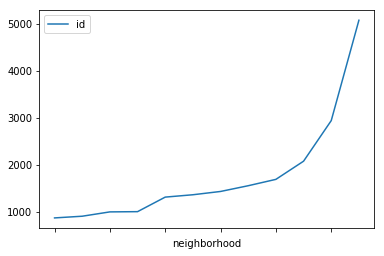

In [23]:
simple_treedisplay.plot()

![alt text](https://media.giphy.com/media/yFWUUCVeZ0ttS/giphy.gif "EARTH")

---
### ***We did the simplification process and creating a data frame with our Water data as well.***

In [24]:
waterfeatures.groupby('neighborhood')['id'].count().sort_values(ascending=True)

neighborhood
Lower Lawrenceville           1
East Hills                    1
Middle Hill                   1
New Homestead                 1
Central Northside             1
Oakwood                       1
Homewood West                 1
Squirrel Hill North           1
Point Breeze North            1
Bluff                         1
Stanton Heights               1
Strip District                1
Upper Lawrenceville           1
Bon Air                       1
Homewood South                1
South Side Slopes             2
Perry South                   2
Swisshelm Park                2
Upper Hill                    2
Marshall-Shadeland            2
West End                      2
Westwood                      2
Larimer                       2
Windgap                       2
Central Oakland               2
Allentown                     2
Hays                          2
Central Business District     2
Duquesne Heights              2
Central Lawrenceville         2
                           

In [25]:
def filter_less_than(x, threshold):
    if len(x) <= threshold:
        return False
    else:
        return True
    
water_amount = waterfeatures.groupby("neighborhood").filter(filter_less_than, 
                                                     threshold=5)

simple_waterdisplay= pd.DataFrame(water_amount.groupby("neighborhood")["id"].count().sort_values(ascending=True))

simple_waterdisplay

,id
neighborhood,
Allegheny Center,6
Brighton Heights,6
Carrick,6
Elliott,6
Spring Hill-City View,6
Troy Hill,6
Perry North,7
Point Breeze,7
Bloomfield,8


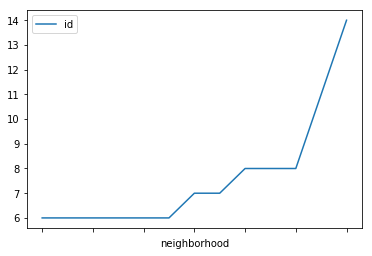

In [26]:
simple_waterdisplay.plot()

![alt text](https://media.giphy.com/media/F4w8zTcuwntv2/giphy.gif "WATER")

---

### ***After looking at our information we decided it wasn't the best idea to cut down the amount of data shown in our fire dataset because when trying to merge it with our other datasets later in our process we would need all the data. So, we just removed the columns that were unecessary and turned the set into a data frame.***

In [27]:
largesimplefire= pd.DataFrame(fire_incidents.groupby('neighborhood')['call_no'].count().sort_values(ascending=True))
largesimplefire

,call_no
neighborhood,
Mount Oliver Borough,4
Regent Square,6
East Carnegie,6
Mt. Oliver,7
Arlington Heights,9
Oakwood,10
Hays,11
Chartiers City,11
Swisshelm Park,11


![alt text](https://media.giphy.com/media/d0O4zETPaQC08/giphy.gif "FIRE")

In [28]:
simple_treedisplay

,id
neighborhood,
Mount Washington,874
Brighton Heights,910
Central Business District,1002
Perry North,1007
Point Breeze,1316
East Liberty,1366
Bloomfield,1436
Shadyside,1558
South Side Flats,1693


In [29]:
simple_waterdisplay

,id
neighborhood,
Allegheny Center,6
Brighton Heights,6
Carrick,6
Elliott,6
Spring Hill-City View,6
Troy Hill,6
Perry North,7
Point Breeze,7
Bloomfield,8


### ***Now that we had all the dataframes that we needed, we continued to merge our data. We didnt want to create a too complicated code for Jupyter to handle so we just started by merging our tree and water data.***

In [30]:
waterandtree= pd.merge(simple_treedisplay,simple_waterdisplay, on='neighborhood')
waterandtree

,id_x,id_y
neighborhood,,
Brighton Heights,910,6
Perry North,1007,7
Point Breeze,1316,7
Bloomfield,1436,8
Highland Park,2941,11
Squirrel Hill South,5073,14


### ***Here we added our fire data to visualize all our data for the neighborhoods together***

In [31]:
fireWaterTree= pd.merge(waterandtree, largesimplefire, on='neighborhood')
fireWaterTree

,id_x,id_y,call_no
neighborhood,,,
Brighton Heights,910,6,105
Perry North,1007,7,83
Point Breeze,1316,7,57
Bloomfield,1436,8,120
Highland Park,2941,11,54
Squirrel Hill South,5073,14,178


### ***Then of course we had to make it look pretty and make more sense to a random viewer***

In [32]:
FWT= pd.DataFrame({'Neighborhood': ['Brighton Heights','Perry North','Point Breeze',
                                   'Bloomfield', 'Highland Park', 'Squirrel Hill South'],
                  'Trees': [910, 1007, 1316, 1436, 2941, 5073],
                  'Water Features':[6, 7, 7, 8, 11, 14],
                  'Fire Incidents':[105, 83, 57, 120, 54, 178]})
FWT

,Neighborhood,Trees,Water Features,Fire Incidents
0,Brighton Heights,910,6,105
1,Perry North,1007,7,83
2,Point Breeze,1316,7,57
3,Bloomfield,1436,8,120
4,Highland Park,2941,11,54
5,Squirrel Hill South,5073,14,178


### ***TA-DA!! By looking at this dataframe we can see what neighborhood is the best...***

### Best Neighborhood= Highland Park

### ***But you have to really analyze our dataframe to really see that conclusion.Here is where we decided to try to pull out the neighborhood with all the qualities we want in a neighborhood without having to go through the whole dataframe.***

### ***Now we decided to get fancy... We want to make a bar graph to represent all our data for our top 6 neighborhoods***

## **Conclusion Time**

#### Constantine's Conclusion:


#### Ryan's Conclusion:


#### Isabela's Conclusion:
